### Otsu’s Image segmentation (Threshold-based segmentation)

#### Python Code implementation for Otsu’s image segmentation

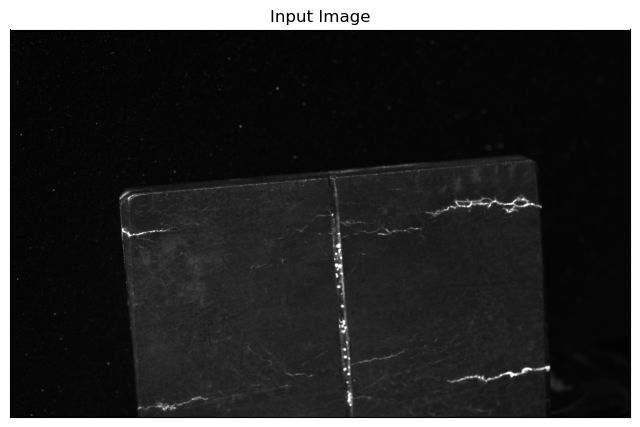

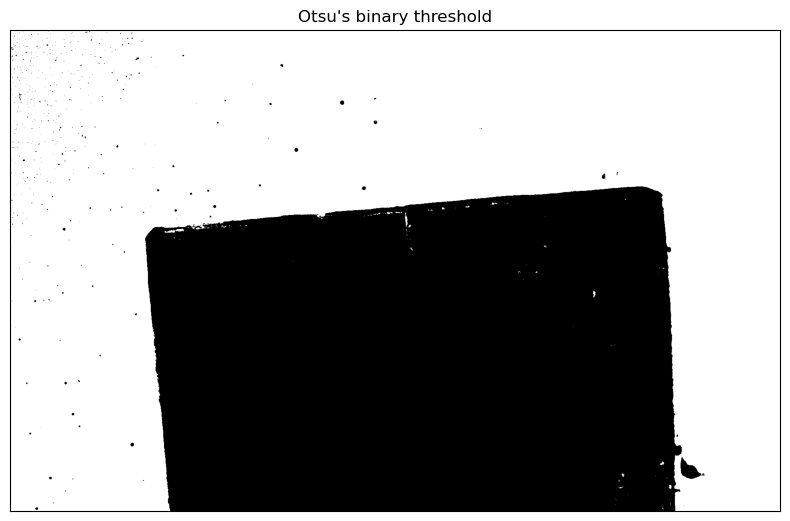

In [1]:
# SEGMENTATION
# SEGMENTATION
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(r'test_image1.bmp')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
#plt.subplot(211)
plt.subplots(figsize=(8, 8))
plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(212),
plt.subplots(figsize=(8, 8))
plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.bmp',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

#### Edge-based image segmentation algorithms
The different types of edge detection operators are:

i. Robert operator: It highlights regions of high spatial frequency

ii. Prewitt operator: It is used for detecting vertical and horizontal edges in images

iii. Sobel operator: It is used for detecting vertical and horizontal edges in images. Similar to Prewitt



#### Python Code implementation for Robert operator for image segmentation:

Text(0.5, 1.0, 'Removing small objects')

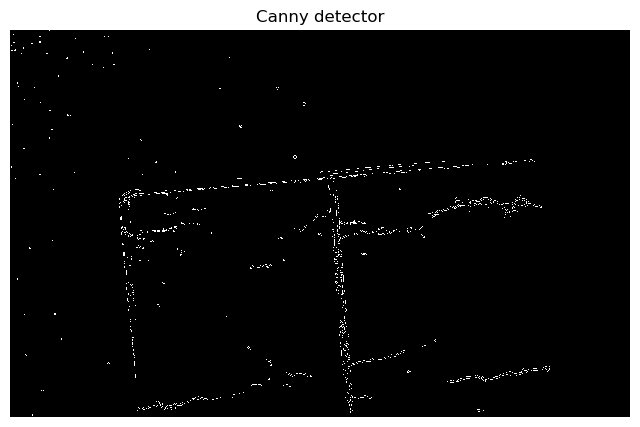

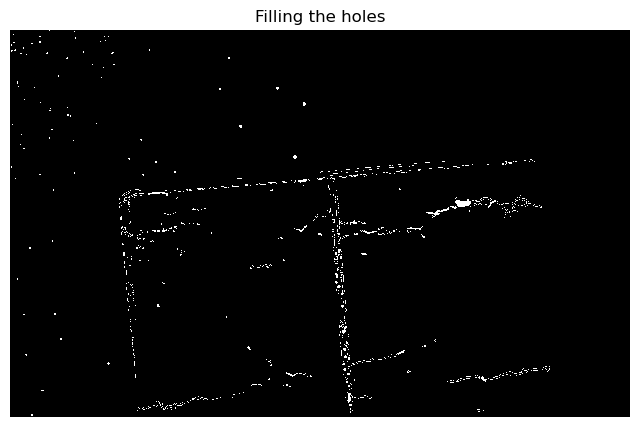

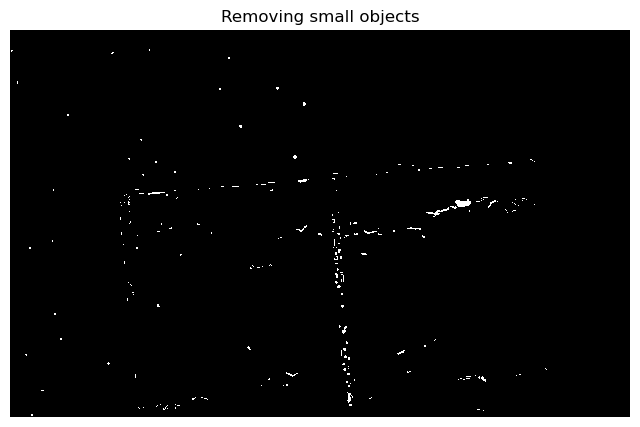

In [37]:
from skimage.feature import canny
img = cv2.imread('test_image1.bmp')

grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = canny(grey)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')

ax.axis('off')

ax.set_title('Canny detector')

from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')

ax.axis('off')

ax.set_title('Filling the holes')

from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(coins_cleaned, cmap=plt.cm.gray, interpolation='nearest')

ax.axis('off')

ax.set_title('Removing small objects')

### To do: Python Code implementation for Robert operator for image segmentation:
### To do: Python Code implementation for Prewitt operator:


### Region-based image segmentation algorithm

#### Python Code implementation for Region based segmentation:

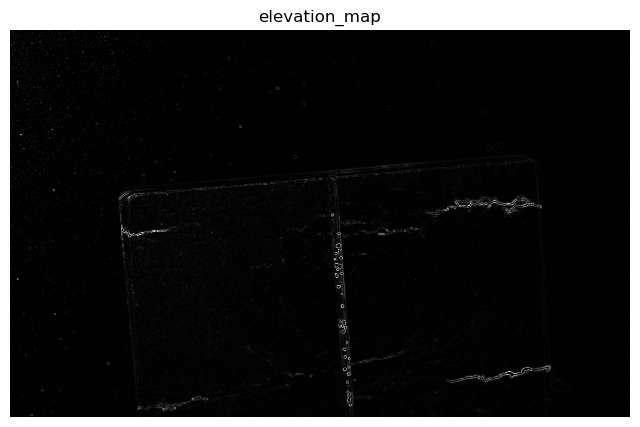

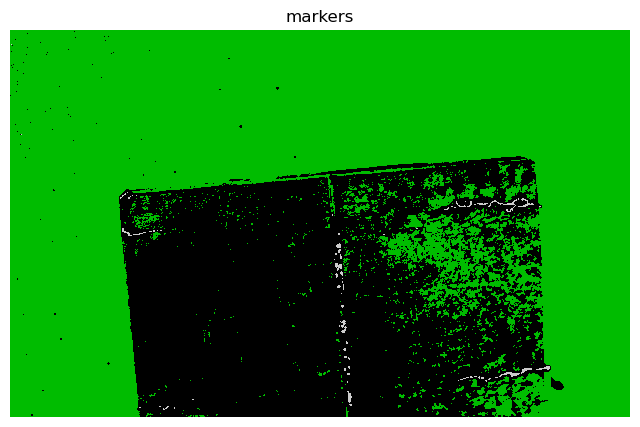

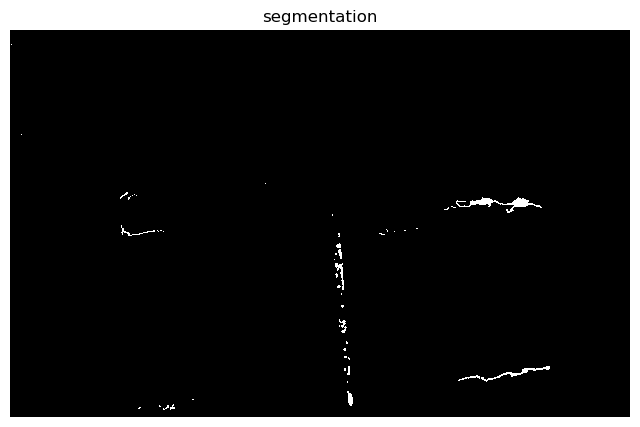

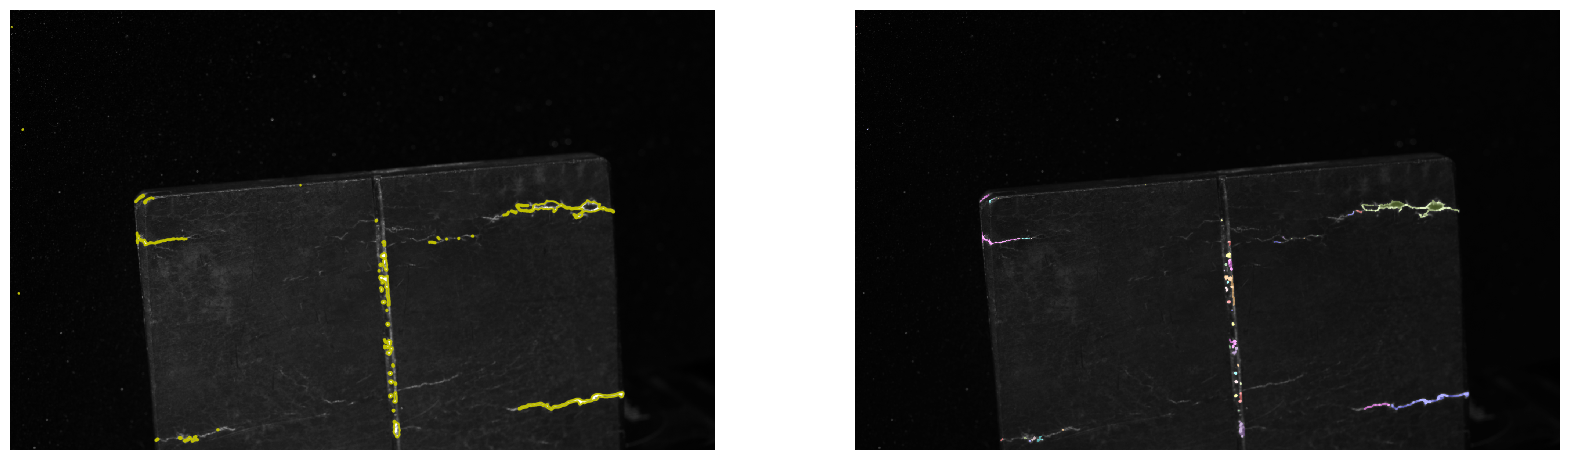

In [55]:
from skimage.filters import sobel
from skimage.segmentation import watershed
elevation_map = sobel(grey)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')

ax.axis('off')

ax.set_title('elevation_map')

markers = np.zeros_like(grey)

markers[grey < 30] = 1

markers[grey > 150] = 2

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')

ax.axis('off')

ax.set_title('markers')

segmentation = watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')

ax.axis('off')

ax.set_title('segmentation')

from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)

labeled_coins, _ = ndi.label(segmentation)

image_label_overlay = label2rgb(labeled_coins, image=grey)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)

ax1.imshow(grey, cmap=plt.cm.gray, interpolation='nearest')

ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')

ax1.axis('off')

#ax1.set_adjustable('box-forced')

ax2.imshow(image_label_overlay, interpolation='nearest')

ax2.axis('off')

#ax2.set_adjustable('box-forced')

fig.subplots_adjust(bottom=0.1, top=0.9)
#fig.subplots_adjust(**margin)

### Neural networks for image segmentation using python

In [56]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# model = Sequential()
# model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,1)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(200,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(2,activation='softmax'))
# model.summary()
# model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
# model.fit(X_train,y_train,batch_size=50,epochs=20,verbose=1)

2024-01-29 20:17:20.101017: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

NameError: name 'X_train' is not defined

### Python Code implementation for Watershed segmentation:

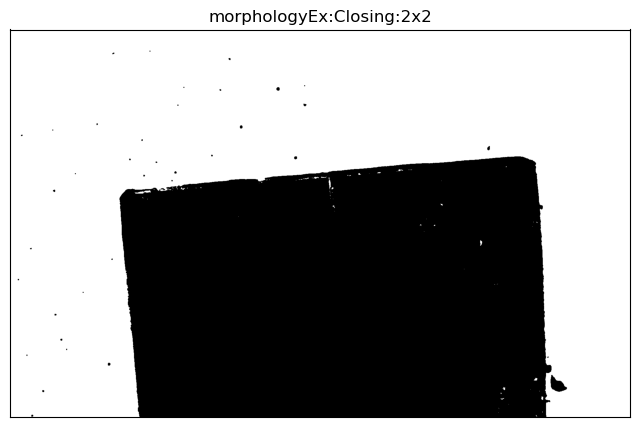

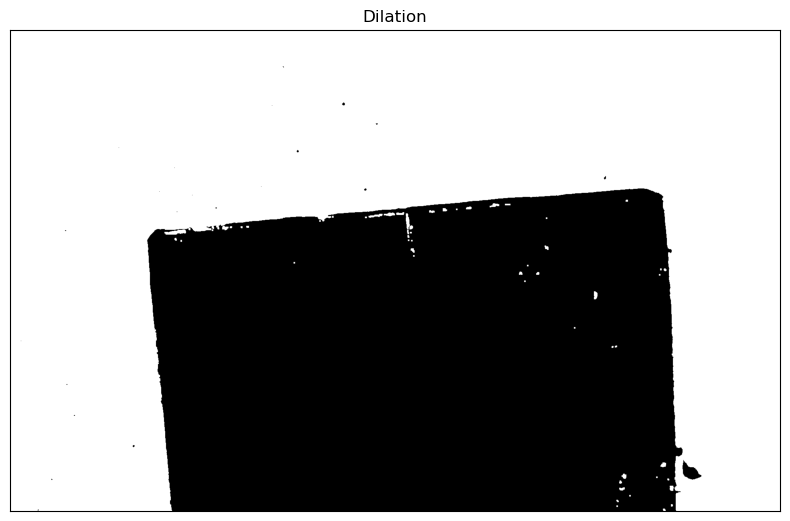

In [63]:
# SEGMENTATION
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('test_image1.bmp')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# b,g,r = cv2.split(img)
# rgb_img = cv2.merge([r,g,b])

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplots(figsize=(8, 8))
plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplots(figsize=(8, 8))
plt.imshow(sure_bg, 'gray')
plt.imsave(r'dilation.png',sure_bg)
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


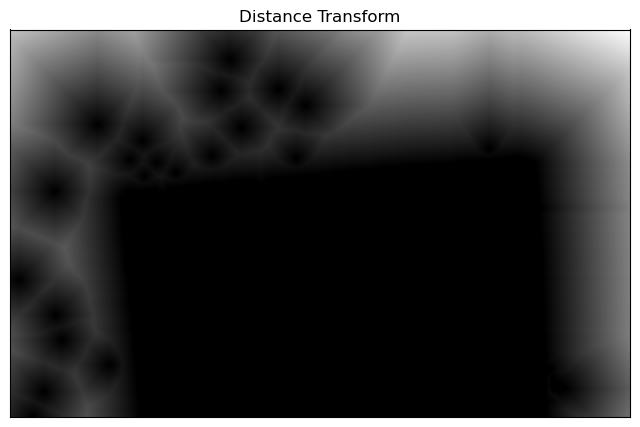

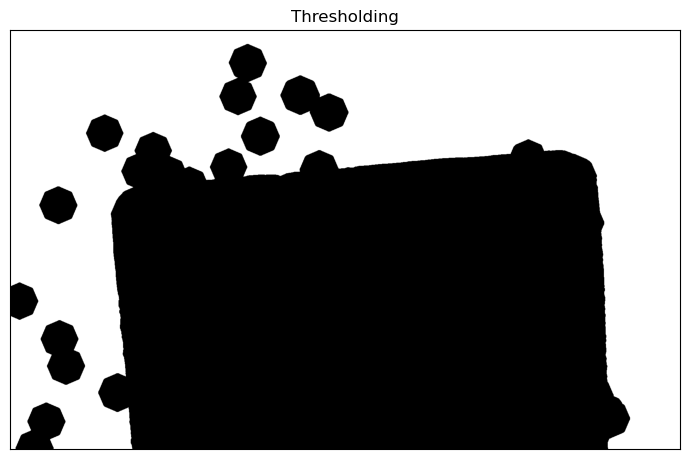

In [68]:
plt.subplots(figsize=(8, 8))
plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplots(figsize=(7, 7)),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

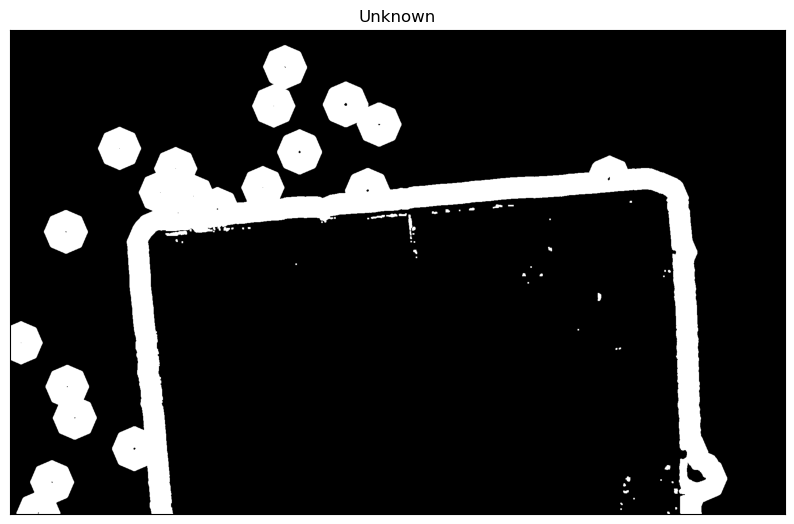

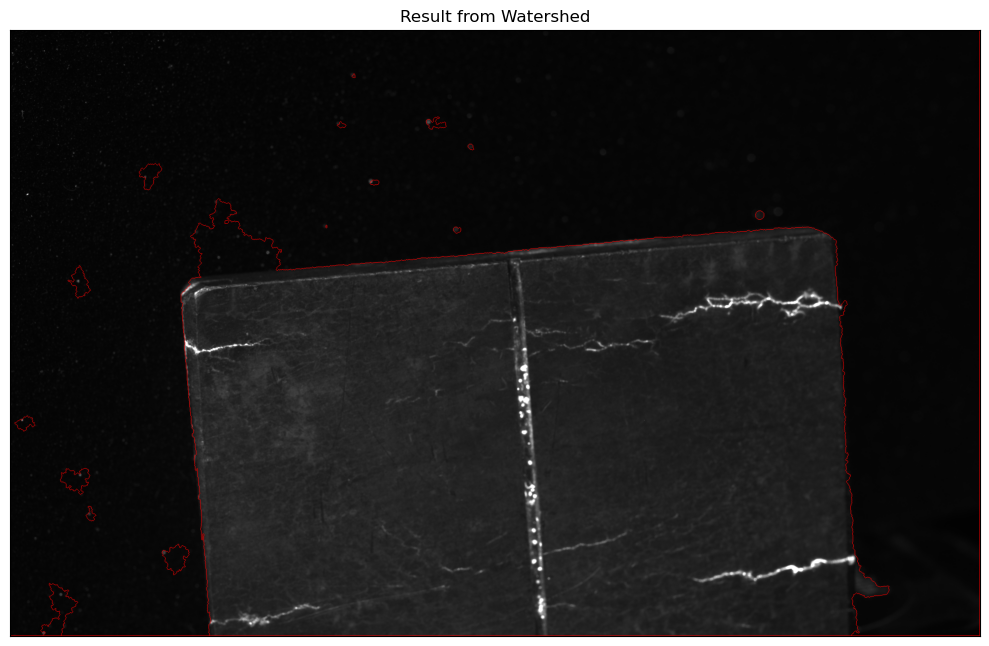

In [3]:
plt.subplots(figsize=(10, 10))
plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])
plt.subplots(figsize=(10, 10)),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()